In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
df = pd.read_excel('E Commerce Dataset.xlsx')
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3786,53787,0,14.0,Mobile Phone,2,13.0,Credit Card,Male,3.0,4,Grocery,1,Single,3,1,22.0,NaN,8.0,8.0,289.37
49,50050,0,18.0,Mobile Phone,3,10.0,Debit Card,Female,1.0,3,Laptop & Accessory,5,Married,5,1,11.0,0.0,1.0,3.0,150.06
4617,54618,1,1.0,Computer,3,12.0,E wallet,Male,4.0,4,Mobile Phone,4,Single,3,1,15.0,2.0,2.0,1.0,143.78
1733,51734,0,15.0,Phone,1,NaN,Debit Card,Female,3.0,3,Mobile,5,Married,4,0,16.0,0.0,1.0,2.0,125.76
5531,55532,0,30.0,Mobile Phone,3,18.0,E wallet,Female,3.0,5,Laptop & Accessory,5,Married,6,0,17.0,1.0,2.0,1.0,178.80


#  Descriptive Statistic

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [8]:
num_dtypes = [ 'int64', 'float64']
num_df = df.select_dtypes(include=num_dtypes)
nums = num_df.columns
print("kolom tipe numerik =", nums)
string_dtypes = [ 'object']
string_df = df.select_dtypes(include=string_dtypes)
string_ = string_df.columns
print("kolom tipe katergorik = ", string_)

kolom tipe numerik = Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
kolom tipe katergorik =  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


# Univariate Analysis

In [9]:
nums1 = [  'Tenure', 'CityTier', 'WarehouseToHome','HourSpendOnApp', 'NumberOfDeviceRegistered']
nums2 = ['SatisfactionScore','NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear','CouponUsed']
nums3 = ['OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

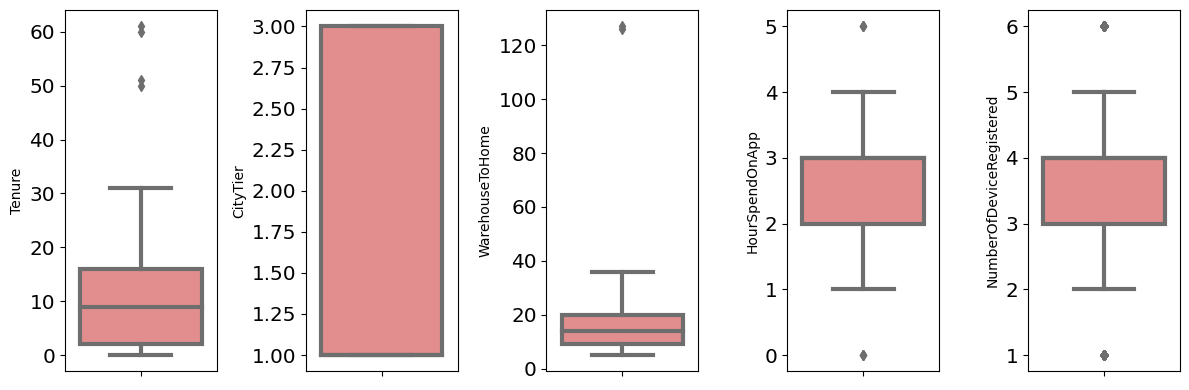

In [10]:
for i in range(0, len(nums1)):
    plt.subplot(1, len(nums1), i+1)
    sns.boxplot(y=df[nums1[i]], color='lightcoral', orient='v')
    plt.tight_layout()

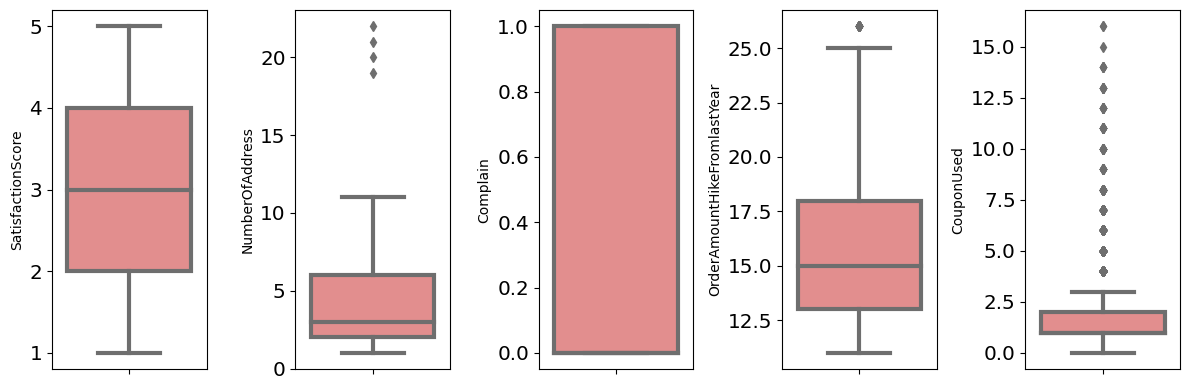

In [11]:
for i in range(0, len(nums2)):
    plt.subplot(1, len(nums2), i+1)
    sns.boxplot(y=df[nums2[i]], color='lightcoral', orient='v')
    plt.tight_layout()

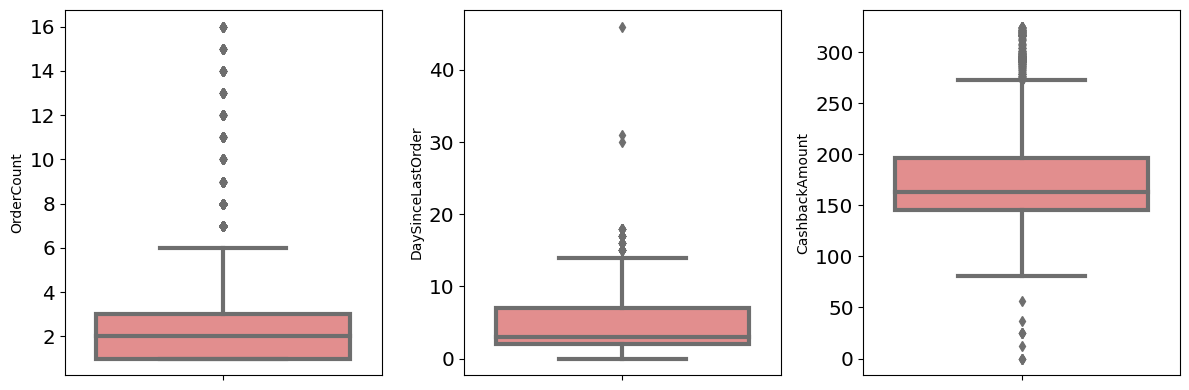

In [12]:
for i in range(0, len(nums3)):
    plt.subplot(1, len(nums3), i+1)
    sns.boxplot(y=df[nums3[i]], color='lightcoral', orient='v')
    plt.tight_layout()

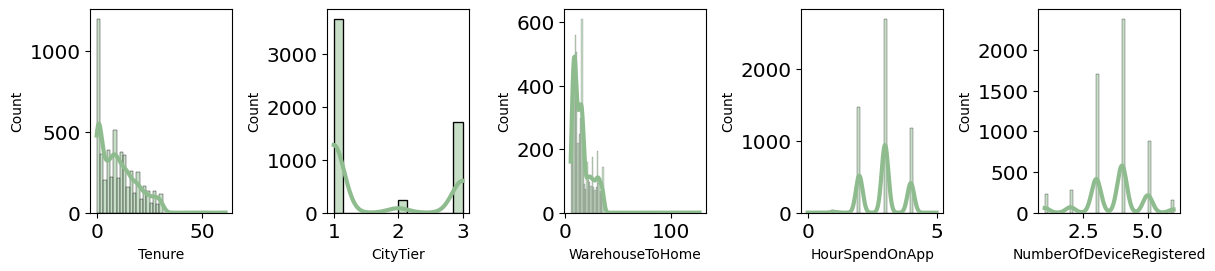

In [13]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums1)):
    plt.subplot(2, len(nums1), i+1)
    sns.histplot(df[nums1[i]], color='darkseagreen' ,  kde = True)
    plt.tight_layout()

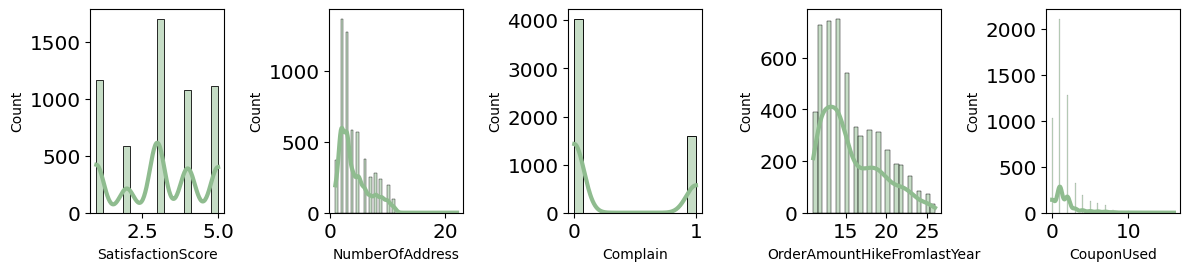

In [14]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums2)):
    plt.subplot(2, len(nums2), i+1)
    sns.histplot(df[nums2[i]], color='darkseagreen' ,  kde = True)
    plt.tight_layout()

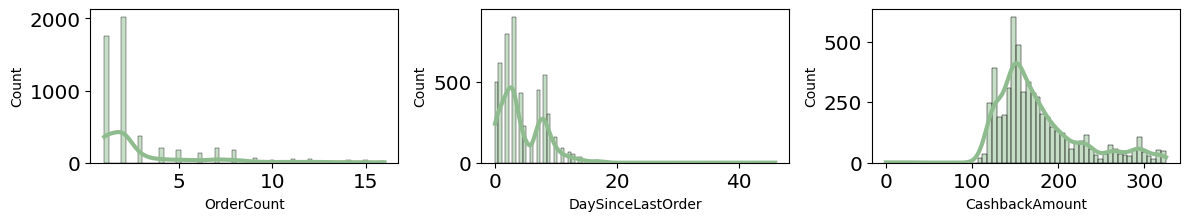

In [15]:
plt.figure(figsize=(12, 4))
for i in range(0, len(nums3)):
    plt.subplot(2, len(nums3), i+1)
    sns.histplot(df[nums3[i]], color='darkseagreen' , kde = True)
    plt.tight_layout()

In [16]:
kategorik1 = [ 'Churn', 'PreferredLoginDevice', 'PreferredPaymentMode']
kategorik2 = ['Gender', 'PreferedOrderCat', 'MaritalStatus']

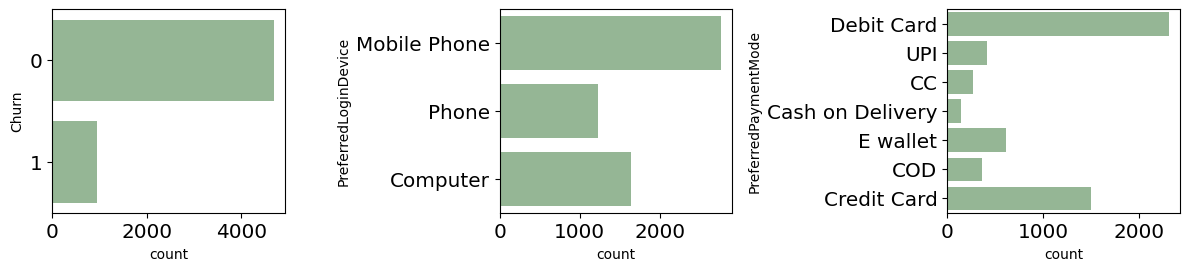

In [17]:
plt.figure(figsize=(12, 5))
for i in range(0, len(kategorik1)):
    plt.subplot(2, len(kategorik1), i+1)
    sns.countplot(y= kategorik1[i], data = df, color='darkseagreen' )
   
    plt.tight_layout()

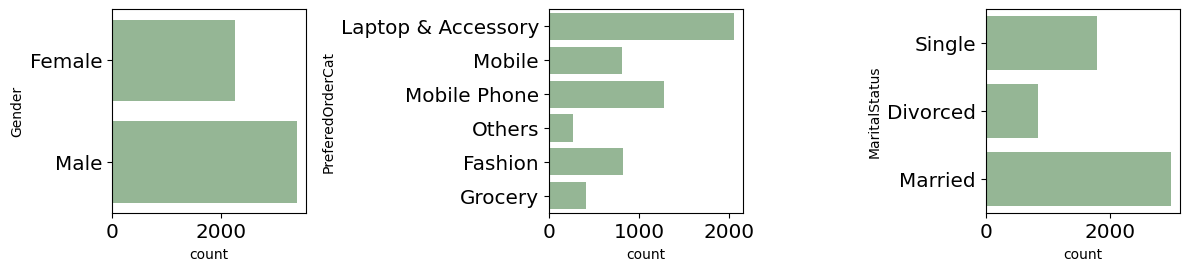

In [18]:
plt.figure(figsize=(12, 5))
for i in range(0, len(kategorik2)):
    plt.subplot(2, len(kategorik2), i+1)
    sns.countplot(y = kategorik2[i], data = df, color='darkseagreen' )
    plt.tight_layout()

# Multivariate Analysis

<AxesSubplot:>

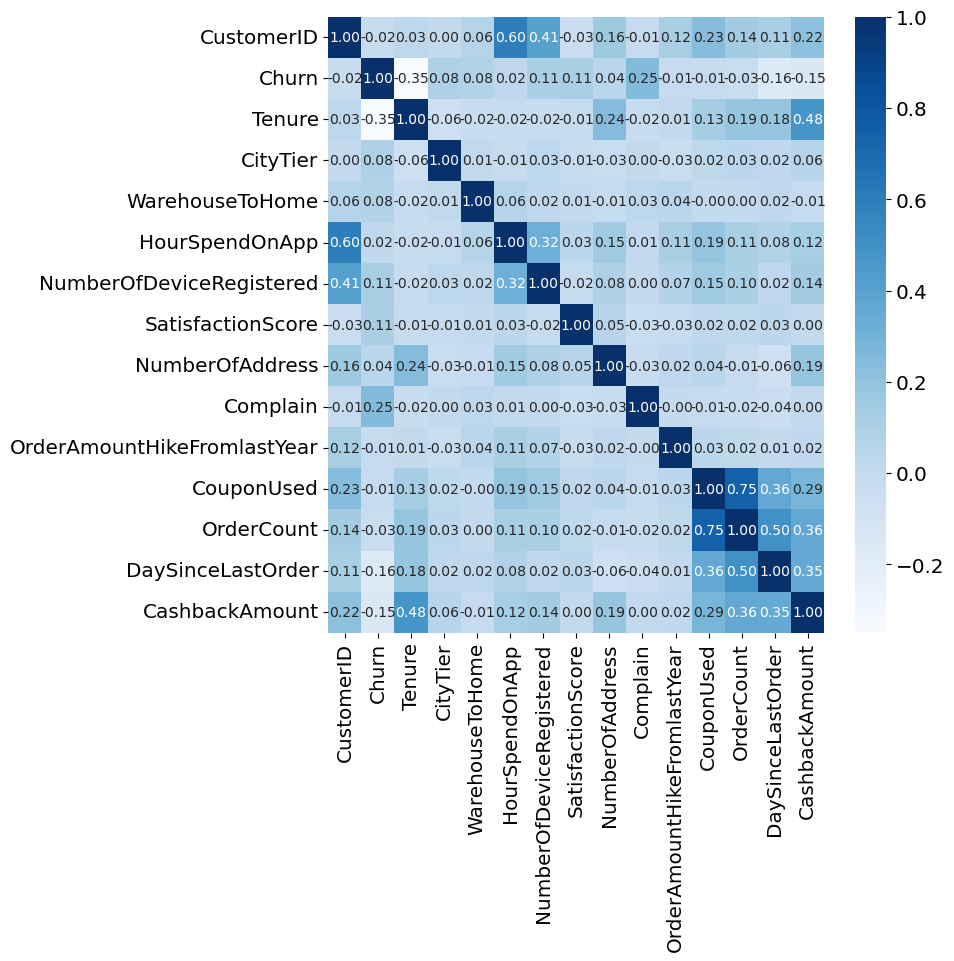

In [26]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

# Penjelasan 
Cari korelasi dengan target
1.  `tenure` memiliki korelasi negatif ( -0.35) yang berarti jika salah satu fitur semakin besar maka fitur yang lain akan turun. Maksudnya yaitu jika makin lama customer berlangganan kemungkinan churn semakin kecil.
2. `Number of device registered` memiliki korelasi positif 0.11 
3. `Satifactions Score` memiliki korelasi positif 0.11 yang artinya semakin tinggi rating yang di berikan maka kemungkinan customer tidak churn besar.
4. `complain`  (0.25) korelasi positif yang artinya semakin banyak komplain di lakukan customer kemungkinan churn tinggi.
5. `order amount hike from last year` (-0.01)`coupon used` `order count` (-0.03) jika order tiap tahun tinggi maka tingkat churn rendah, dan ketika kupon tinggi maka tingkat churn rendah 

<Figure size 1500x1500 with 0 Axes>

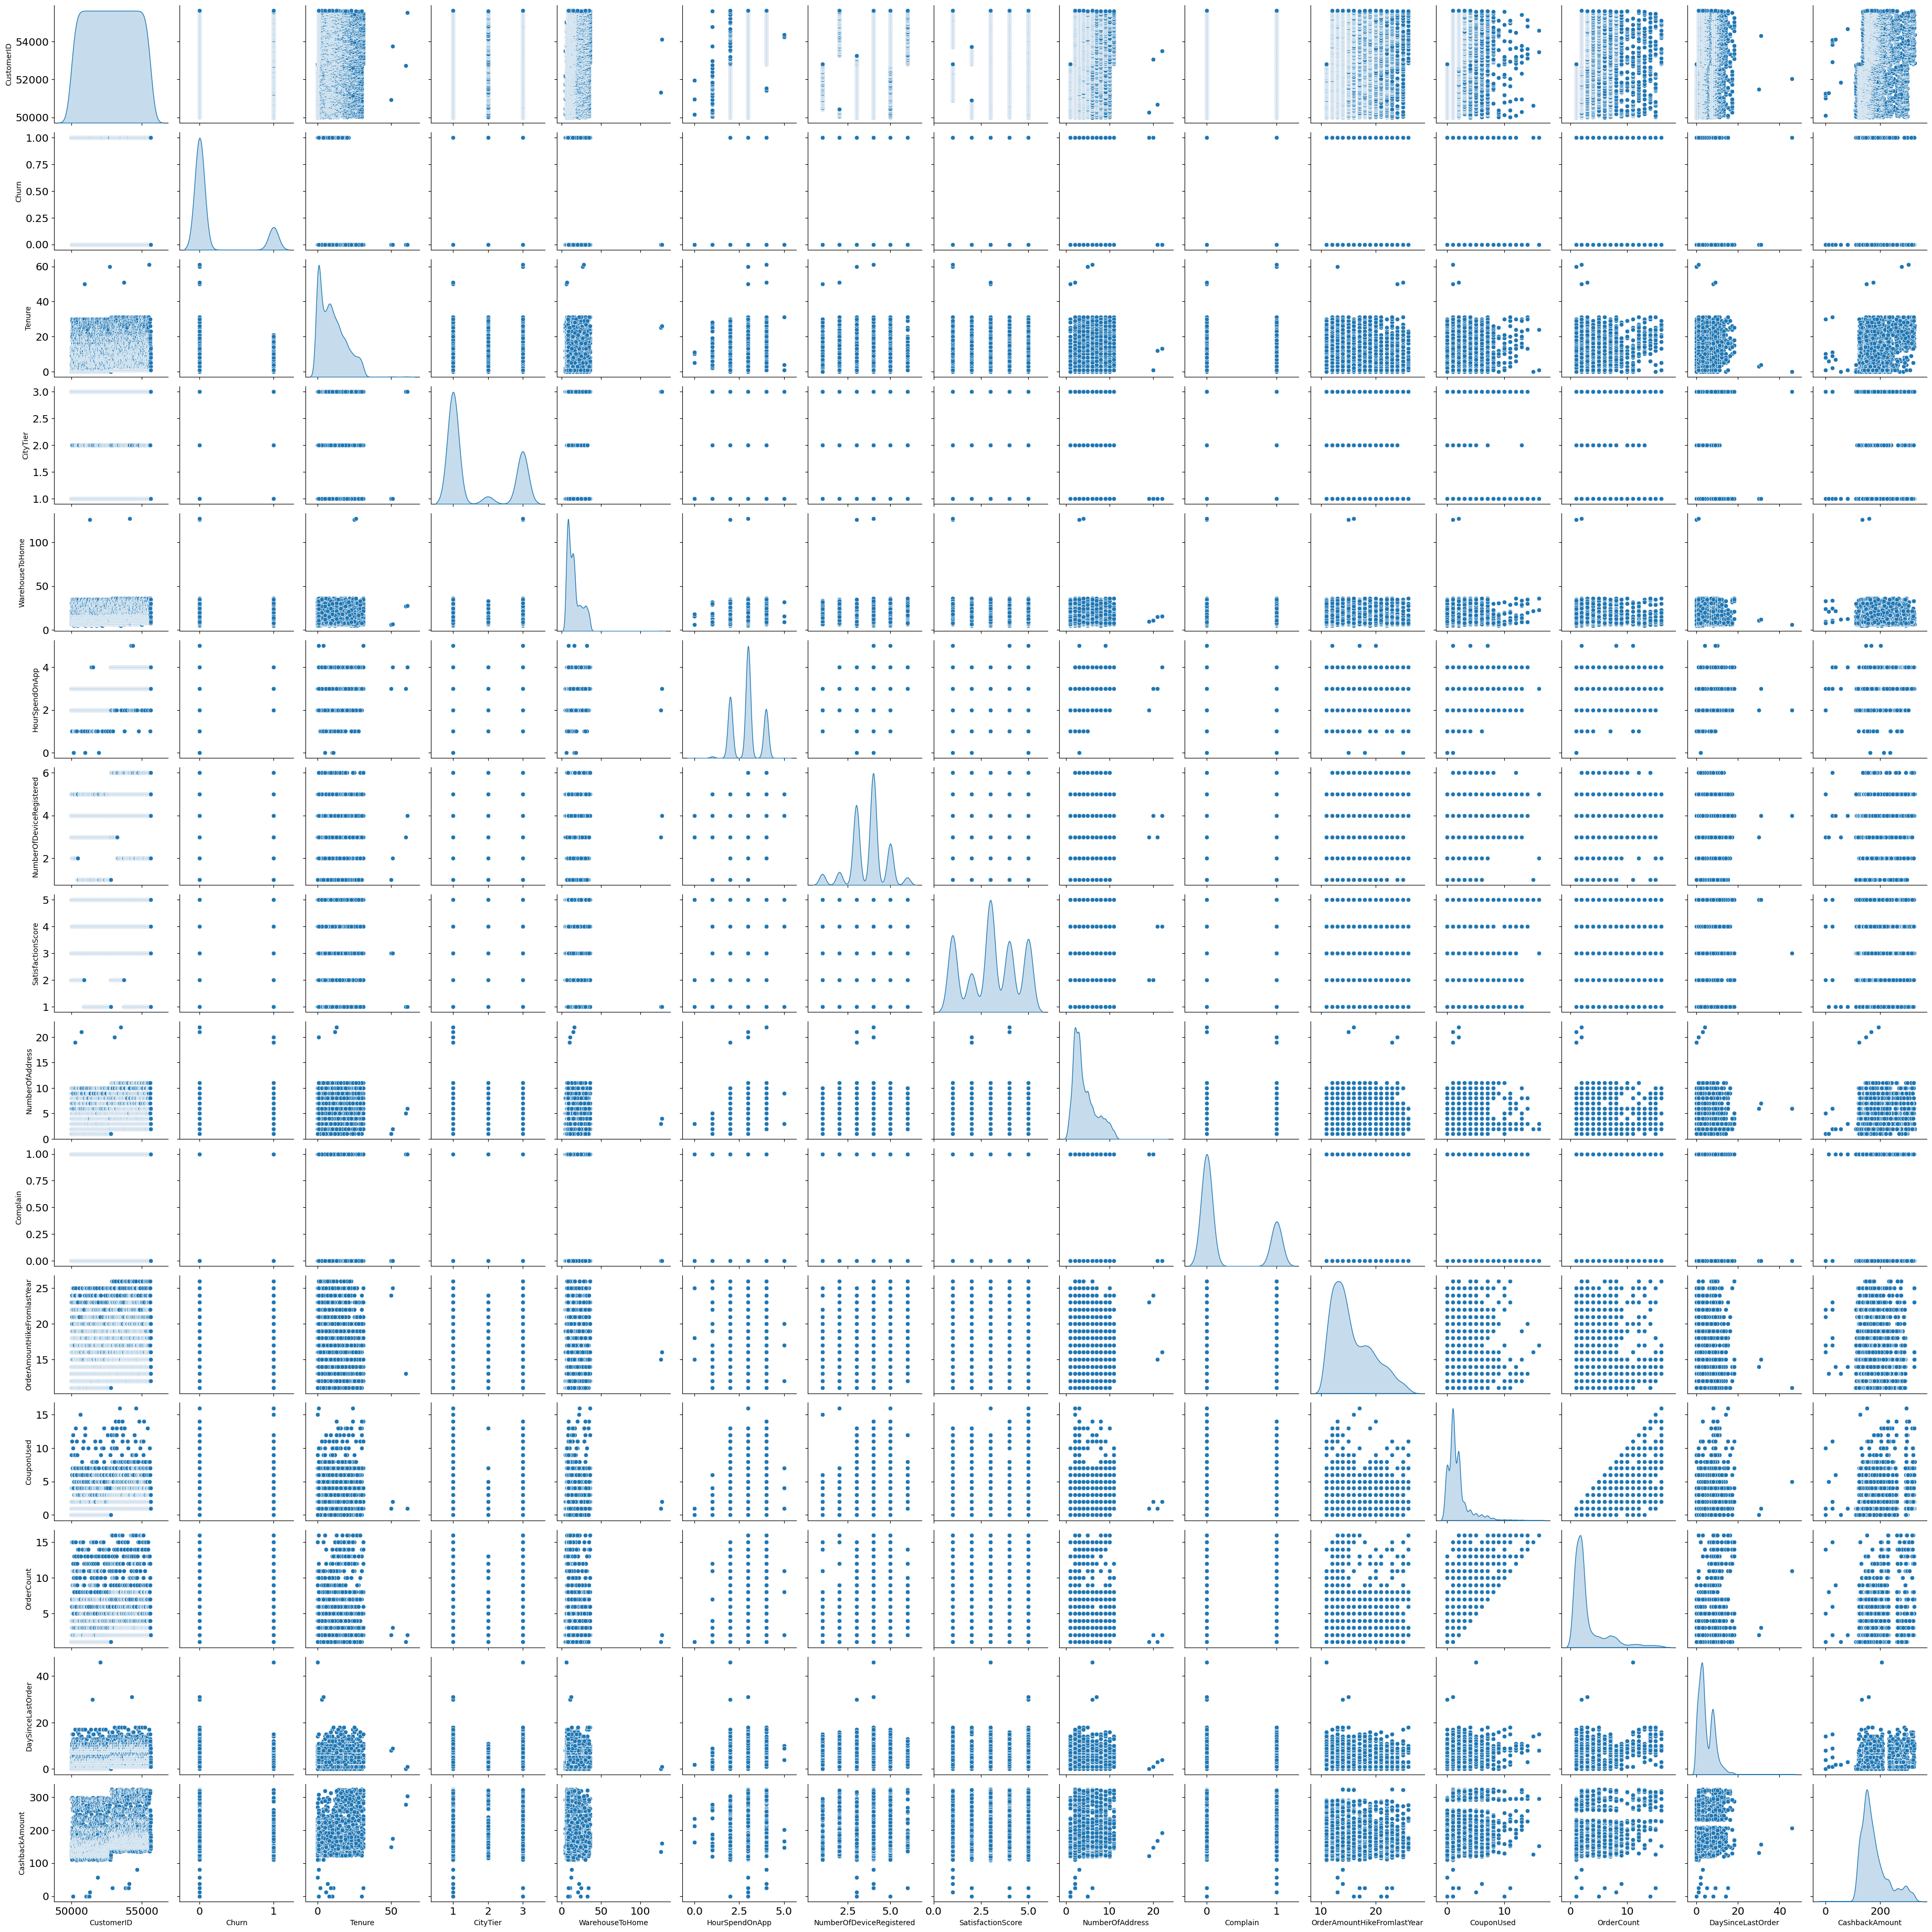

In [27]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')